# Analysis of computation time

In [24]:
from timeit import Timer
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)
import bruteCharges
from ewaldCharges import ewald

In [3]:
#Defining the atomic system for CsCl

alattice = 4.119 # Defines the lattice spacing of the cell
a = np.array ([1,0,0])
b = np.array ([0,1,0])
c = np.array ([0,0,1])

nq = 2
q = np.zeros([nq], dtype = 'float')
q[0] =  1. # Tells to tag a positive charge to the first q (Cs)
q[1] = -1. # Tells to tag a negative charge to the second q (Cl)
tau = np.zeros([3,nq], dtype = 'float')
tau[:,0] = [0,0,0] # Indicates the coordinates of the (Cs) in the cell/lattice
tau[:,1] = [1./2.,1./2.,1./2.] # Indicates the coordinates of the (Cl) in the cell/lattice

In [17]:
def measureTime(hmaxT, parallel, nTimes):
    # get the start time
    st = time.time()

    for i in range(nTimes):
        bruteCharges.sumCharges(a, b, c, q, tau, hmaxT, parallel)

    # get the end time
    et = time.time()

    # get execution time
    res = (et - st) / nTimes
    print('CPU Execution time:', res, 'seconds')
    return res

In [26]:
#Measure time of brute force in parallel mode
lims = np.linspace(1, 20, 20, dtype=int)
n = 10
timesParallel = []
for i in lims:
    timesParallel.append(measureTime(i, True, n))

CPU Execution time: 1.3922541618347168 seconds
CPU Execution time: 1.4203813791275024 seconds
CPU Execution time: 1.4606857776641846 seconds
CPU Execution time: 1.44668390750885 seconds
CPU Execution time: 1.4801910877227784 seconds
CPU Execution time: 1.5188998937606812 seconds
CPU Execution time: 1.5100146293640138 seconds
CPU Execution time: 1.5621784210205079 seconds
CPU Execution time: 1.6004185438156129 seconds
CPU Execution time: 1.611328363418579 seconds
CPU Execution time: 1.6760197877883911 seconds
CPU Execution time: 1.744877290725708 seconds
CPU Execution time: 1.8410221576690673 seconds
CPU Execution time: 1.948253297805786 seconds
CPU Execution time: 2.0280213356018066 seconds
CPU Execution time: 2.175979161262512 seconds
CPU Execution time: 2.1780797243118286 seconds
CPU Execution time: 2.3005136251449585 seconds
CPU Execution time: 2.3144596338272097 seconds
CPU Execution time: 2.4561624050140383 seconds


In [19]:
#Measure time of brute force in serial mode
lims = np.linspace(1, 20, 20, dtype=int)
n = 10
timesSerial = []
for i in lims:
    timesSerial.append(measureTime(i, False, n))

CPU Execution time: 0.0035999536514282225 seconds
CPU Execution time: 0.007898998260498048 seconds
CPU Execution time: 0.021900081634521486 seconds
CPU Execution time: 0.04430060386657715 seconds
CPU Execution time: 0.08020093441009521 seconds
CPU Execution time: 0.13692965507507324 seconds
CPU Execution time: 0.20440189838409423 seconds
CPU Execution time: 0.2961954355239868 seconds
CPU Execution time: 0.4124067068099976 seconds
CPU Execution time: 0.6376596689224243 seconds
CPU Execution time: 0.8489926338195801 seconds
CPU Execution time: 1.0856531381607055 seconds
CPU Execution time: 1.3903501510620118 seconds
CPU Execution time: 1.674707865715027 seconds
CPU Execution time: 2.064998960494995 seconds
CPU Execution time: 2.519930696487427 seconds
CPU Execution time: 2.994973921775818 seconds
CPU Execution time: 3.4698962211608886 seconds
CPU Execution time: 4.115749812126159 seconds
CPU Execution time: 4.734872722625733 seconds


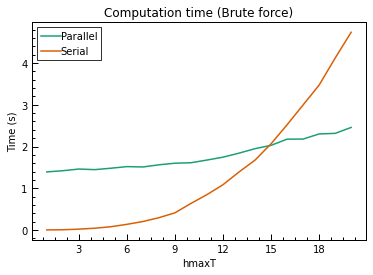

In [30]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Computation time (Brute force)')
ax.set_xlabel('hmaxT')
ax.set_ylabel('Time (s)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(lims, timesParallel, label='Parallel')
ax.plot(lims, timesSerial, label='Serial')
ax.legend()
fig.savefig('Plots/timeParallel.png')

## Comparison Ewald and Brute force

In [22]:
def measureTimeEwald(hmaxT, parallel, nTimes):
    # get the start time
    st = time.time()

    for i in range(nTimes):
        ewald(a, b, c, q, tau, 2.0, 1, hmaxT, parallel)

    # get the end time
    et = time.time()

    # get execution time
    res = (et - st) / nTimes
    print('CPU Execution time:', res, 'seconds')
    return res

In [27]:
#Measure time of ewald in parallel
lims = np.linspace(1, 20, 20, dtype=int)
n = 10
timesParallelEwald = []
for i in lims:
    timesParallelEwald.append(measureTimeEwald(i, True, n))

CPU Execution time: 2.8476301193237306 seconds
CPU Execution time: 2.8300285816192625 seconds
CPU Execution time: 2.8331295013427735 seconds
CPU Execution time: 2.8321297407150268 seconds
CPU Execution time: 2.849829387664795 seconds
CPU Execution time: 2.9048303365707397 seconds
CPU Execution time: 2.9141302347183227 seconds
CPU Execution time: 2.962131142616272 seconds
CPU Execution time: 3.03593111038208 seconds
CPU Execution time: 3.0213316440582276 seconds
CPU Execution time: 3.1351324796676634 seconds
CPU Execution time: 3.1554327487945555 seconds
CPU Execution time: 3.2477337598800657 seconds
CPU Execution time: 3.3864352464675904 seconds
CPU Execution time: 3.4174360752105715 seconds
CPU Execution time: 3.666918706893921 seconds
CPU Execution time: 3.7360469818115236 seconds
CPU Execution time: 3.605536675453186 seconds
CPU Execution time: 3.6554383277893066 seconds
CPU Execution time: 3.712438201904297 seconds


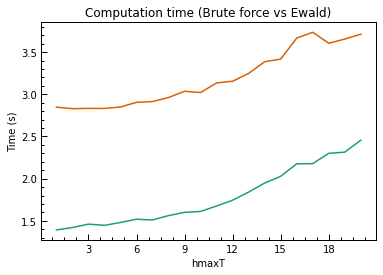

In [28]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Computation time (Brute force vs Ewald)')
ax.set_xlabel('hmaxT')
ax.set_ylabel('Time (s)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(lims, timesParallel, label='Brute force')
ax.plot(lims, timesParallelEwald, label='Ewald')
ax.legend()
fig.savefig('Plots/timeEwald.png')

In [29]:
#Measure time of ewald in serial
lims = np.linspace(1, 20, 20, dtype=int)
n = 10
timesSerialEwald = []
for i in lims:
    timesSerialEwald.append(measureTimeEwald(i, False, n))

CPU Execution time: 0.0045013904571533205 seconds
CPU Execution time: 0.0120988130569458 seconds
CPU Execution time: 0.028700089454650878 seconds
CPU Execution time: 0.06440057754516601 seconds
CPU Execution time: 0.10660438537597657 seconds
CPU Execution time: 0.171799898147583 seconds
CPU Execution time: 0.262902045249939 seconds
CPU Execution time: 0.3793076276779175 seconds
CPU Execution time: 0.5285014867782593 seconds
CPU Execution time: 0.7142110347747803 seconds
CPU Execution time: 0.940806245803833 seconds
CPU Execution time: 1.2000154733657837 seconds
CPU Execution time: 1.5161166429519652 seconds
CPU Execution time: 1.8754683494567872 seconds
CPU Execution time: 2.2881213426589966 seconds
CPU Execution time: 2.773028516769409 seconds
CPU Execution time: 3.323336434364319 seconds
CPU Execution time: 3.9071395635604858 seconds
CPU Execution time: 4.547851419448852 seconds
CPU Execution time: 5.252151346206665 seconds


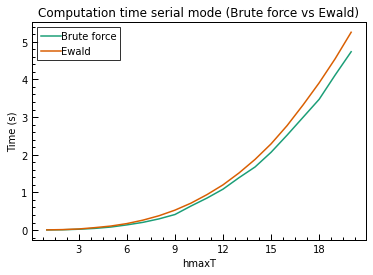

In [34]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Computation time serial mode (Brute force vs Ewald)')
ax.set_xlabel('hmaxT')
ax.set_ylabel('Time (s)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(lims, timesSerial, label='Brute force')
ax.plot(lims, timesSerialEwald, label='Ewald')
ax.legend()
fig.savefig('Plots/timeEwaldSerial.png')